# Data Science with Jupyter in VS Code

This notebook demonstrates advanced data science capabilities using pandas, matplotlib, and seaborn.

In [3]:
# Install missing packages if needed
%pip install pandas numpy matplotlib seaborn

# Import essential data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure matplotlib for better plots
plt.style.use('default')
sns.set_palette("husl")

print("📊 Data Science libraries loaded successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Note: you may need to restart the kernel to use updated packages.
📊 Data Science libraries loaded successfully!
Pandas version: 2.2.3
NumPy version: 2.2.6
Note: you may need to restart the kernel to use updated packages.
📊 Data Science libraries loaded successfully!
Pandas version: 2.2.3
NumPy version: 2.2.6


## Creating Sample Data

In [4]:
# Create a sample dataset
np.random.seed(42)  # For reproducible results

# Generate sample data
n_samples = 100
data = {
    'age': np.random.normal(35, 10, n_samples).astype(int),
    'salary': np.random.normal(75000, 25000, n_samples).astype(int),
    'experience': np.random.normal(8, 4, n_samples).astype(int),
    'department': np.random.choice(['Engineering', 'Marketing', 'Sales', 'HR'], n_samples),
    'satisfaction': np.random.uniform(1, 10, n_samples).round(1)
}

# Create DataFrame
df = pd.DataFrame(data)

# Clean the data
df['age'] = df['age'].clip(22, 65)  # Realistic age range
df['salary'] = df['salary'].clip(40000, 150000)  # Realistic salary range
df['experience'] = df['experience'].clip(0, 40)  # Realistic experience range

print(f"Dataset created with {len(df)} employees")
print("\nFirst 5 rows:")
df.head()

Dataset created with 100 employees

First 5 rows:


,age,salary,experience,department,satisfaction
0,39,40000,9,Engineering,1.7
1,33,64483,10,HR,8.4
2,41,66432,12,Marketing,7.4
3,50,54943,12,Engineering,1.7
4,32,70967,2,Engineering,1.8


## Data Analysis

In [5]:
# Basic statistics
print("📈 Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\n📊 Descriptive Statistics:")
df.describe().round(2)

📈 Dataset Overview:
Shape: (100, 5)
Columns: ['age', 'salary', 'experience', 'department', 'satisfaction']

📊 Descriptive Statistics:


,age,salary,experience,satisfaction
count,100.00,100.00,100.00,100.00
mean,33.96,75809.40,7.91,6.08
std,8.15,23410.29,4.19,2.89
min,22.00,40000.00,0.00,1.10
25%,28.00,54858.25,5.00,3.75
50%,33.00,77102.50,8.00,6.30
75%,38.25,88453.75,10.25,8.80
max,53.00,143004.00,23.00,10.00


In [6]:
# Department analysis
print("🏢 Department Analysis:")
dept_stats = df.groupby('department').agg({
    'salary': ['mean', 'median', 'count'],
    'satisfaction': 'mean',
    'experience': 'mean'
}).round(2)

dept_stats.columns = ['Avg_Salary', 'Median_Salary', 'Count', 'Avg_Satisfaction', 'Avg_Experience']
dept_stats

🏢 Department Analysis:


,Avg_Salary,Median_Salary,Count,Avg_Satisfaction,Avg_Experience
department,,,,,
Engineering,76950.09,79472.0,32,5.80,7.75
HR,72358.48,74337.0,25,6.45,8.44
Marketing,81980.71,81262.0,17,5.05,6.65
Sales,73688.58,71664.0,26,6.73,8.42


## Data Visualization

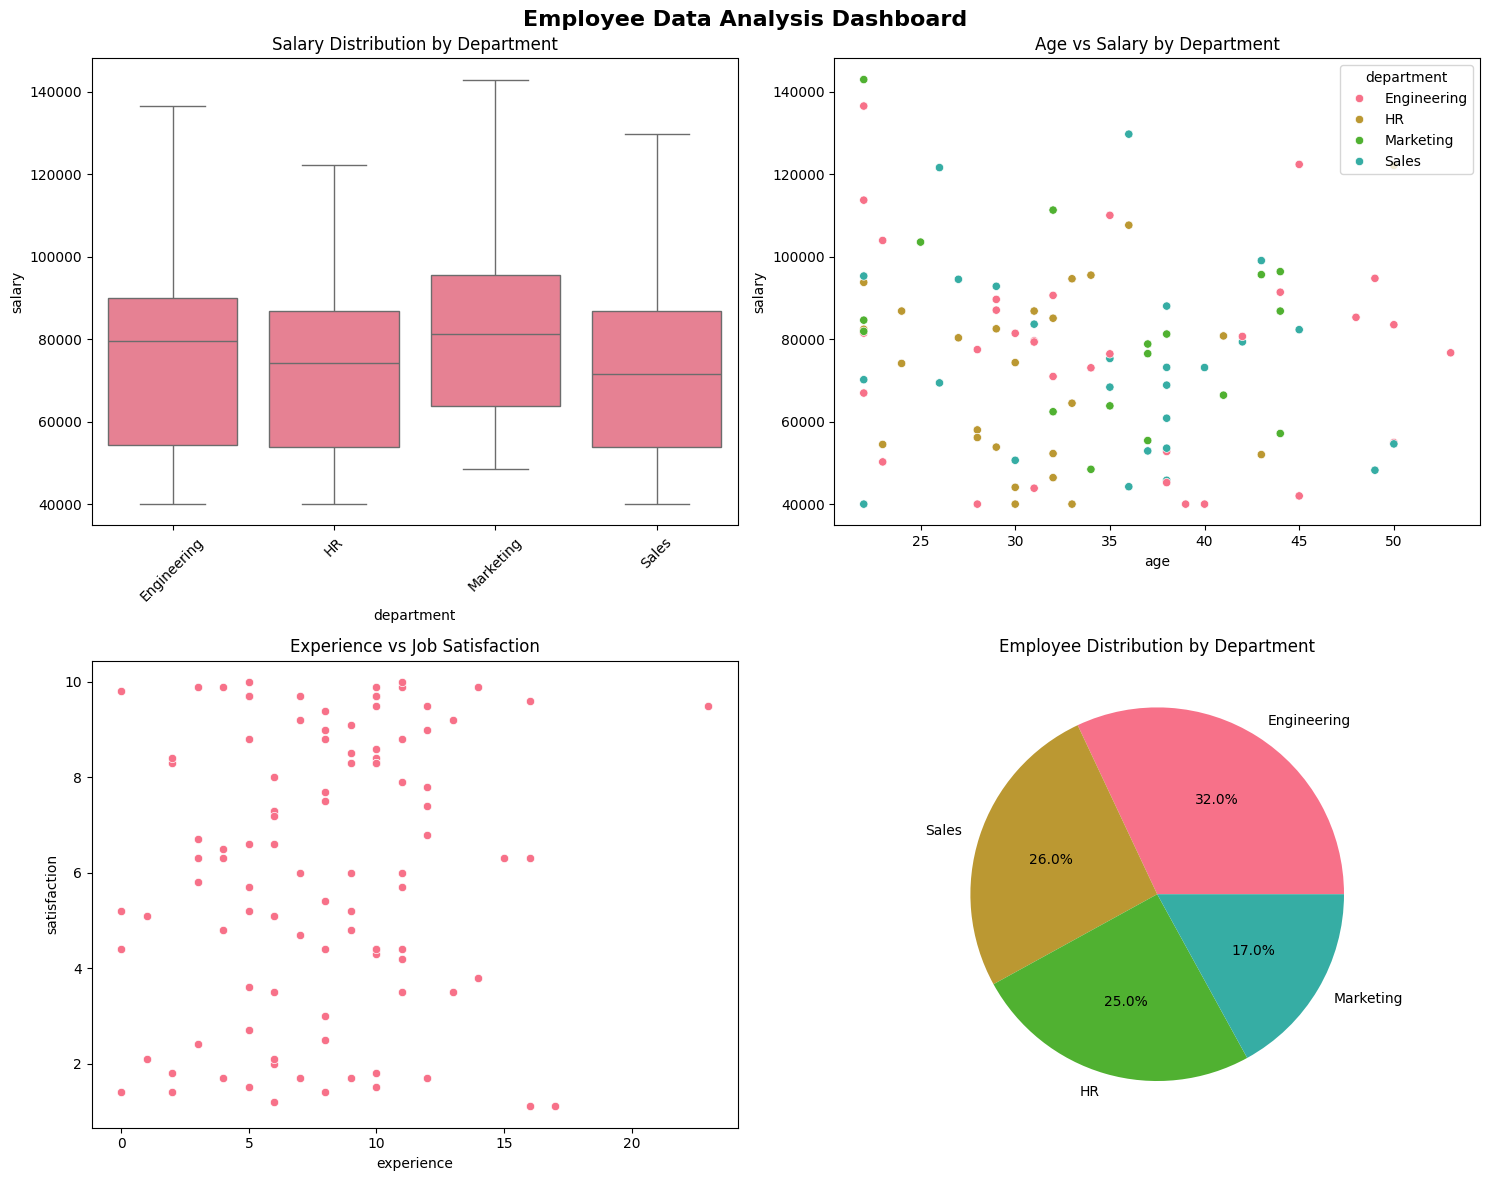

In [7]:
# Create a comprehensive dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Employee Data Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Salary distribution by department
sns.boxplot(data=df, x='department', y='salary', ax=axes[0,0])
axes[0,0].set_title('Salary Distribution by Department')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Age vs Salary scatter plot
sns.scatterplot(data=df, x='age', y='salary', hue='department', ax=axes[0,1])
axes[0,1].set_title('Age vs Salary by Department')

# 3. Experience vs Satisfaction
sns.scatterplot(data=df, x='experience', y='satisfaction', ax=axes[1,0])
axes[1,0].set_title('Experience vs Job Satisfaction')

# 4. Department distribution
dept_counts = df['department'].value_counts()
axes[1,1].pie(dept_counts.values, labels=dept_counts.index, autopct='%1.1f%%')
axes[1,1].set_title('Employee Distribution by Department')

plt.tight_layout()
plt.show()

## Interactive Analysis

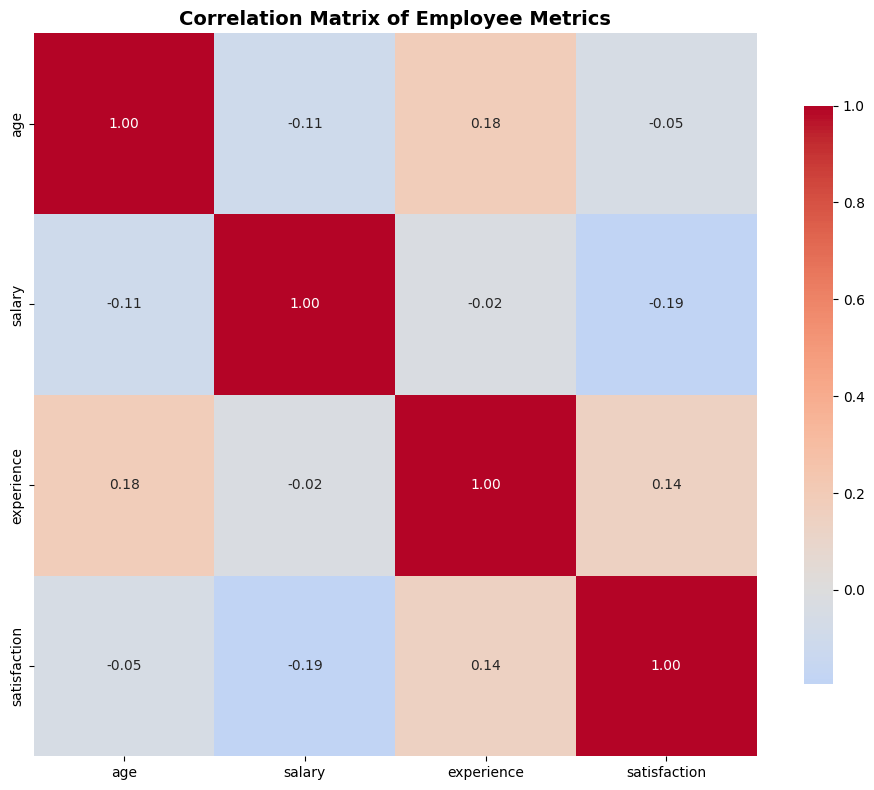

🔍 Strongest Correlations:
age           experience      0.183900
experience    age             0.183900
              satisfaction    0.144295
satisfaction  experience      0.144295
salary        experience     -0.022439
experience    salary         -0.022439
dtype: float64


In [8]:
# Correlation analysis
numeric_cols = ['age', 'salary', 'experience', 'satisfaction']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
           annot=True, 
           cmap='coolwarm', 
           center=0,
           square=True,
           fmt='.2f',
           cbar_kws={'shrink': .8})
plt.title('Correlation Matrix of Employee Metrics', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Find strongest correlations
print("🔍 Strongest Correlations:")
correlations = correlation_matrix.unstack().sort_values(ascending=False)
# Remove self-correlations
correlations = correlations[correlations < 1.0]
print(correlations.head(6))

## Key Insights

This notebook demonstrates:

✅ **Data Creation**: Generated realistic employee dataset  
✅ **Data Analysis**: Descriptive statistics and groupby operations  
✅ **Visualization**: Multiple chart types (box plots, scatter plots, pie charts, heatmaps)  
✅ **Correlation Analysis**: Understanding relationships between variables  

## Next Steps

1. **Try different visualizations**: `plotly` for interactive charts
2. **Machine Learning**: Use `scikit-learn` for predictive modeling
3. **Real Data**: Load CSV/Excel files with `pd.read_csv()` or `pd.read_excel()`
4. **Export Results**: Save plots and data summaries

### Pro Tips for VS Code Jupyter:
- Use `Ctrl/Cmd + Shift + P` → "Python: Select Interpreter" to switch kernels
- Enable variable explorer in VS Code settings
- Use `%%time` magic command to measure cell execution time
- Try `!pip install package_name` to install packages directly in notebooks